In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn as sk
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [2]:
lost_df = pd.read_csv(r"C:\Users\trush\OneDrive\Documents\WFU Grad School Info\BAN 6025 Machine Learning\Data\LostSales.csv")
lost_df.head()

,Quote,Time_to_Delivery,Part_type,Status
0,3452,6,OE,Won
1,429,9,AM,Won
2,102,14,OE,Won
3,1153,16,OE,Lost
4,102,11,OE,Won


In [3]:
le = LabelEncoder()

lost_df['Status'] = le.fit_transform(lost_df['Status'])
lost_df['Status'].value_counts()

Status
1    278
0    272
Name: count, dtype: int64

Quote vs. Status Logistic Regression

In [4]:
X = lost_df['Quote']
X = sm.add_constant(X)

y = lost_df['Status']


lr = sm.Logit(y, X).fit()

print(lr.summary())


Optimization terminated successfully.
         Current function value: 0.692727
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:                 Status   No. Observations:                  550
Model:                          Logit   Df Residuals:                      548
Method:                           MLE   Df Model:                            1
Date:                Wed, 23 Oct 2024   Pseudo R-squ.:               0.0005209
Time:                        10:24:28   Log-Likelihood:                -381.00
converged:                       True   LL-Null:                       -381.20
Covariance Type:            nonrobust   LLR p-value:                    0.5286
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0741      0.119      0.622      0.534      -0.159       0.307
Quote      -1.881e-05   2.99e

Time To Deliver vs. Status Logistic Regression

In [5]:
X = lost_df['Time_to_Delivery']
X = sm.add_constant(X)

y = lost_df['Status']

lr = sm.Logit(y, X).fit()

print(lr.summary())

Optimization terminated successfully.
         Current function value: 0.663757
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Status   No. Observations:                  550
Model:                          Logit   Df Residuals:                      548
Method:                           MLE   Df Model:                            1
Date:                Wed, 23 Oct 2024   Pseudo R-squ.:                 0.04232
Time:                        10:24:28   Log-Likelihood:                -365.07
converged:                       True   LL-Null:                       -381.20
Covariance Type:            nonrobust   LLR p-value:                 1.346e-08
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5829      0.135      4.321      0.000       0.319       0.847
Time_to_Del

Full Logistic Regression

In [6]:
lost_df['Part_type'] = le.fit_transform(lost_df['Part_type'])

X = lost_df.drop(columns=['Status', 'Quote'])
X = sm.add_constant(X)

y = lost_df['Status']

lr = sm.Logit(y, X).fit()

print(lr.summary())

Optimization terminated successfully.
         Current function value: 0.658383
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Status   No. Observations:                  550
Model:                          Logit   Df Residuals:                      547
Method:                           MLE   Df Model:                            2
Date:                Wed, 23 Oct 2024   Pseudo R-squ.:                 0.05007
Time:                        10:24:28   Log-Likelihood:                -362.11
converged:                       True   LL-Null:                       -381.20
Covariance Type:            nonrobust   LLR p-value:                 5.132e-09
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.7235      0.148      4.877      0.000       0.433       1.014
Time_to_Del

Probability To Dataset

In [7]:
#Predicted Values
probability = lr.predict(X)

#Threshold of 0.5 greater than means success
psuccess = (probability > 0.5).astype(int)

#Add these columns to the dataset
lost_df['Probability Predicted'] = probability
lost_df['Probability of Lost'] = psuccess
lost_df

,Quote,Time_to_Delivery,Part_type,Status,Probability Predicted,Probability of Lost
0,3452,6,1,1,0.534363,1
1,429,9,0,1,0.636083,1
2,102,14,1,1,0.497729,0
3,1153,16,1,0,0.488559,0
4,102,11,1,1,0.511485,1
...,...,...,...,...,...,...
545,1481,32,0,0,0.534070,1
546,1432,65,1,0,0.279966,0
547,1369,36,1,1,0.398276,0
548,440,63,0,1,0.393607,0


Confusion Matrix

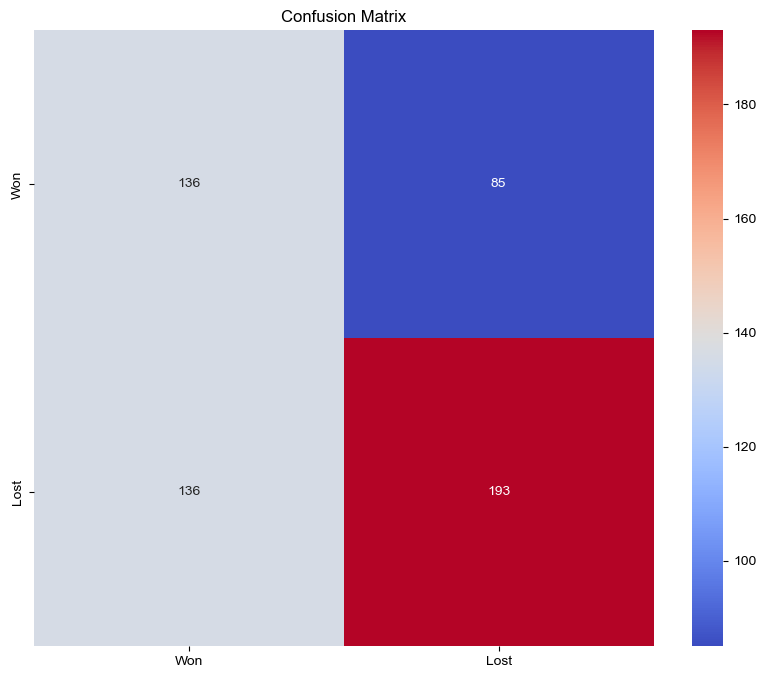

In [8]:
confusion_matrix = confusion_matrix(psuccess, y)

plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix, annot=True, cmap='coolwarm', xticklabels=['Won', 'Lost'],
            yticklabels=['Won', 'Lost'], fmt='g')
sns.set_style('ticks', {'axes.formatter.useoffset': False})
plt.title('Confusion Matrix')
plt.show()

Classification Report

In [9]:
print(classification_report(y, psuccess))

              precision    recall  f1-score   support

           0       0.62      0.50      0.55       272
           1       0.59      0.69      0.64       278

    accuracy                           0.60       550
   macro avg       0.60      0.60      0.59       550
weighted avg       0.60      0.60      0.59       550



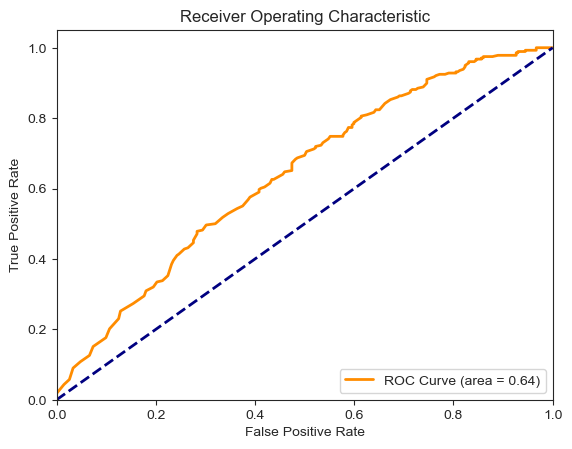

In [11]:
#ROC Curve and the Area Under Curve
fpr, tpr, thresholds = roc_curve(y, probability)
roc_auc = roc_auc_score(y, probability)

#Plot the ROC
plt.figure()
#ROC Curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
#Random Model Curve
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()